# 📝 Exercise M4.03 Modelando relaciones no lineales

In all previous notebooks, we only used a single feature in `data`. But we
have already shown that we could add new features to make the model more
expressive by deriving new features, based on the original feature.

The aim of this notebook is to train a linear regression algorithm on a
dataset with more than a single feature.

We will load a dataset about house prices in California.
The dataset consists of 8 features regarding the demography and geography of
districts in California and the aim is to predict the median house price of
each district. We will use all 8 features to predict the target, the median
house price.


Alvaro Lucio-Villegas de Cea

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>


In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Now it is your turn to train a linear regression model on this dataset.
First, create a linear regression model.

In [2]:
# Write your code here.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


linear_regression = LinearRegression()

Execute a cross-validation with 10 folds and use the mean absolute error
(MAE) as metric. Be sure to *return* the fitted *estimators*.

In [3]:
# Write your code here.
cv_results = cross_validate(linear_regression, data, target,
                            scoring="neg_mean_absolute_error",
                            return_estimator=True, cv=10, n_jobs=2)

Compute the mean and std of the MAE in thousands of dollars (k$).

In [4]:
# Write your code here.
print(f"Media del error total del test: "
      f"{-cv_results['test_score'].mean():.3f} k$ ± "
      f"{cv_results['test_score'].std():.3f}")

Media del error total del test: 54.452 k$ ± 9.109


Inspect the fitted model using a box plot to show the distribution of values
for the coefficients returned from the cross-validation. Hint:
use the function
[`df.plot.box()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)
to create a box plot.

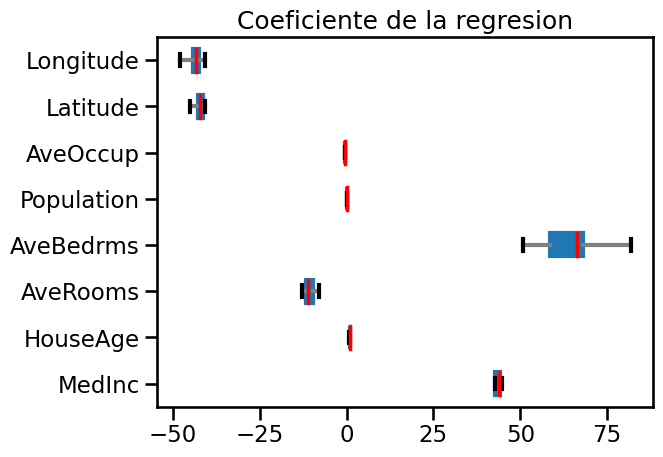

In [7]:
# Write your code here.

import pandas as pd
import matplotlib.pyplot as plt

weights = pd.DataFrame(
    [est.coef_ for est in cv_results["estimator"]], columns=data.columns)



color = {"whiskers": "grey", "medians": "red", "caps": "black"}
weights.plot.box(color=color, vert=False)
a = plt.title("Coeficiente de la regresion")